In [8]:
from statsmodels.tsa.arima.model import ARIMA
import sys

sys.path.append("../..")

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gp
import seaborn as sns
import sklearn

import src.datasets.loading.ookla
import src.datasets.loading.statcan
import src.datasets.joins

from src.config import DATA_DIRECTORY
import warnings

warnings.filterwarnings('ignore')

In [3]:
das_info = gp.read_file(DATA_DIRECTORY / "hackathon" / "geometry.gpkg", driver="GPKG")
speed_data = pd.read_csv(DATA_DIRECTORY / "hackathon" / "speeds.csv")
speed_data.DAUID = speed_data.DAUID.astype(str)

In [4]:
full_data = pd.merge(das_info, speed_data)
full_data["date"] = pd.to_datetime(
    full_data["year"].astype(str)
    + "-"
    + ((full_data["quarter"] - 1) * 3 + 1).astype(str)
    + "-01"
)

In [35]:
selected_df = full_data[['DAUID','PCUID','PCCLASS','CENSUS_YEAR','Pop_2021','Private_Dwellings','Pop_density_square_km',
                          'Land_area_square_km','After-tax_income','Median_household_income',
                          'quarter', 'conn_type','tests','date', 'devices','avg_d_kbps','avg_u_kbps']]
# train_data = selected_data['2019-01-01':'2022-12-31']
# test_data = selected_data['2023-01-01':]
fixed_data = selected_df[selected_df['conn_type'] == 'fixed']
fixed_data.drop(columns=['conn_type'], inplace=True)
mobile_data = selected_df[selected_df['conn_type'] == 'mobile']
mobile_data.drop(columns=['conn_type'], inplace=True)

In [36]:
# fixed_data.set_index('date', inplace=True)
fixed_df = fixed_data.dropna(how='any')
#1 for rural and 0 for urban
fixed_df['area_type'] = fixed_df.apply(lambda row: 0 if row['Pop_density_square_km'] > 400 and row['Pop_2021'] >= 1000 else 1, axis=1)
fixed_df['area_type'].value_counts()

area_type
1    625139
0     70802
Name: count, dtype: int64

In [37]:
from datetime import datetime
fixed_df['year'] = fixed_df['date'].dt.year
fixed_df.drop(columns=['date'], inplace=True)


In [13]:
print(fixed_df)

            DAUID PRUID CDUID   CCSUID   CSDUID ERUID SACCODE CMAUID PCUID  \
0        10010244    10  1001  1001519  1001519  1010     001    001  0792   
2        10010244    10  1001  1001519  1001519  1010     001    001  0792   
4        10010244    10  1001  1001519  1001519  1010     001    001  0792   
6        10010244    10  1001  1001519  1001519  1010     001    001  0792   
8        10010244    10  1001  1001519  1001519  1010     001    001  0792   
...           ...   ...   ...      ...      ...   ...     ...    ...   ...   
2263546  59530210    59  5953  5953042  5953023  5950     970    970  0679   
2263548  59530210    59  5953  5953042  5953023  5950     970    970  0679   
2263550  59530210    59  5953  5953042  5953023  5950     970    970  0679   
2263552  59530210    59  5953  5953042  5953023  5950     970    970  0679   
2263554  59530210    59  5953  5953042  5953023  5950     970    970  0679   

        PCCLASS  ...  Median_household_income  \
0             

Index(['avg_d_kbps', 'year', 'PCCLASS', 'DAUID', 'Median_household_income',
       'Pop_2021', 'PCUID', 'After-tax_income', 'Pop_density_square_km',
       'Private_Dwellings', 'devices', 'quarter', 'tests',
       'Land_area_square_km', 'area_type'],
      dtype='object')


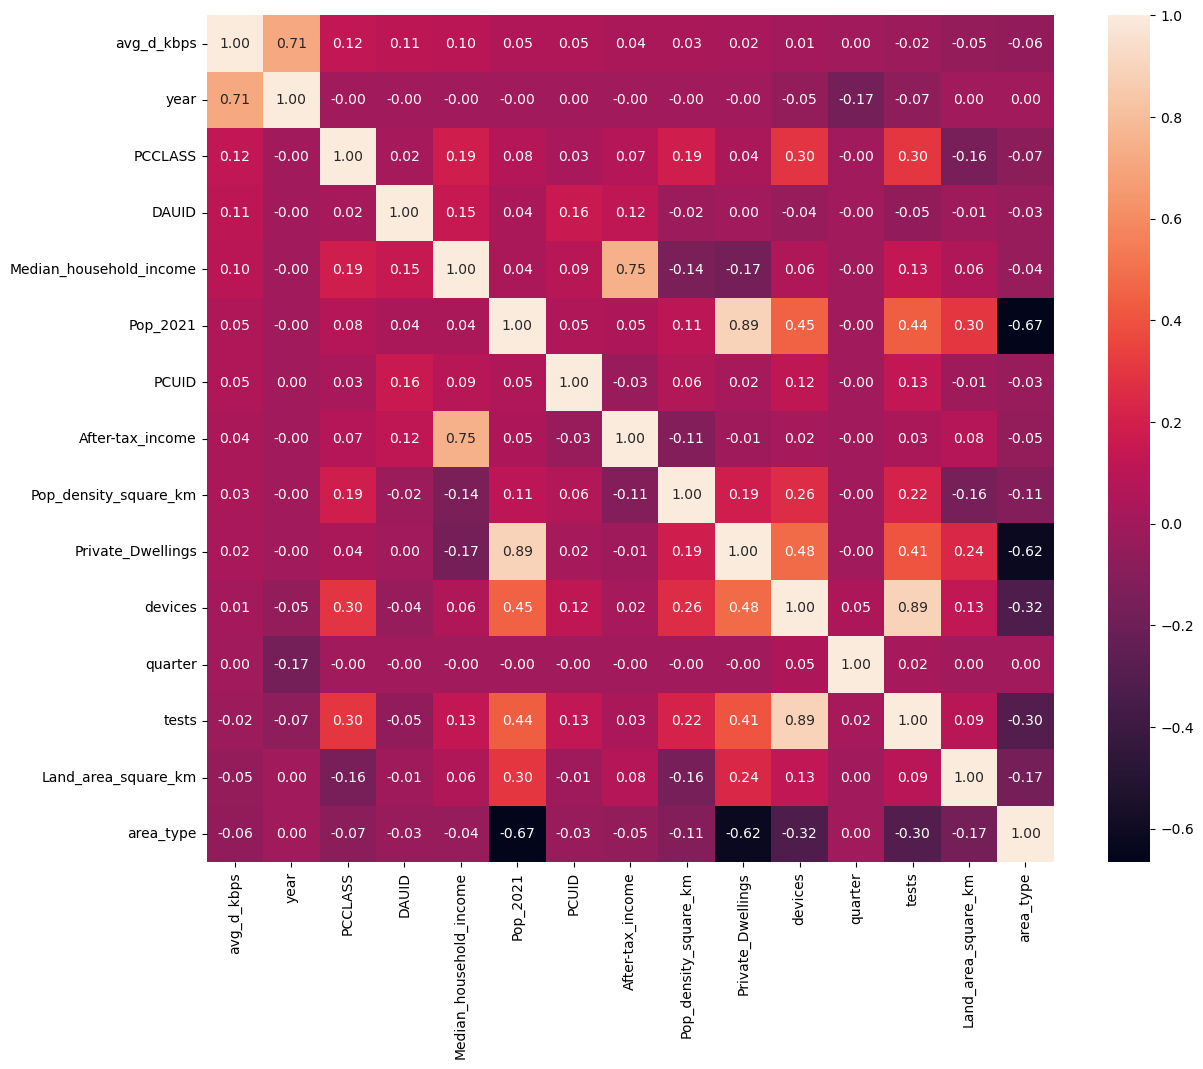

In [38]:
# correaltion analysis
fixed_d = fixed_df.drop(columns=['avg_u_kbps'])
corr_fix = fixed_d.corr()
k = 15
cols = corr_fix.nlargest(k, 'avg_d_kbps')['avg_d_kbps'].index
print(cols)
cm = fixed_d[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.savefig('heatmap.png')
plt.show()

In [ ]:
train_data = selected_data['2019-01-01':'2022-12-31']
test_data = selected_data['2023-01-01':]